In [1]:
import numpy as np
import pandas as pd
from preprocess import Preprocess
from scipy.sparse.csgraph import connected_components
import umap
import matplotlib.pyplot as plt

In [2]:
data = Preprocess('http://skill.shinshu-u.ac.jp/2013/4-18/20130417140951_18-4-0-0-0_strokes.txt/strokes/pointlists', 1)
df = data.df_dropcol
# data.draw_stroke_px(df[0:1])

In [36]:
df_point = df[df['shape_int'] == 4]
df = df_point
len(df)

145

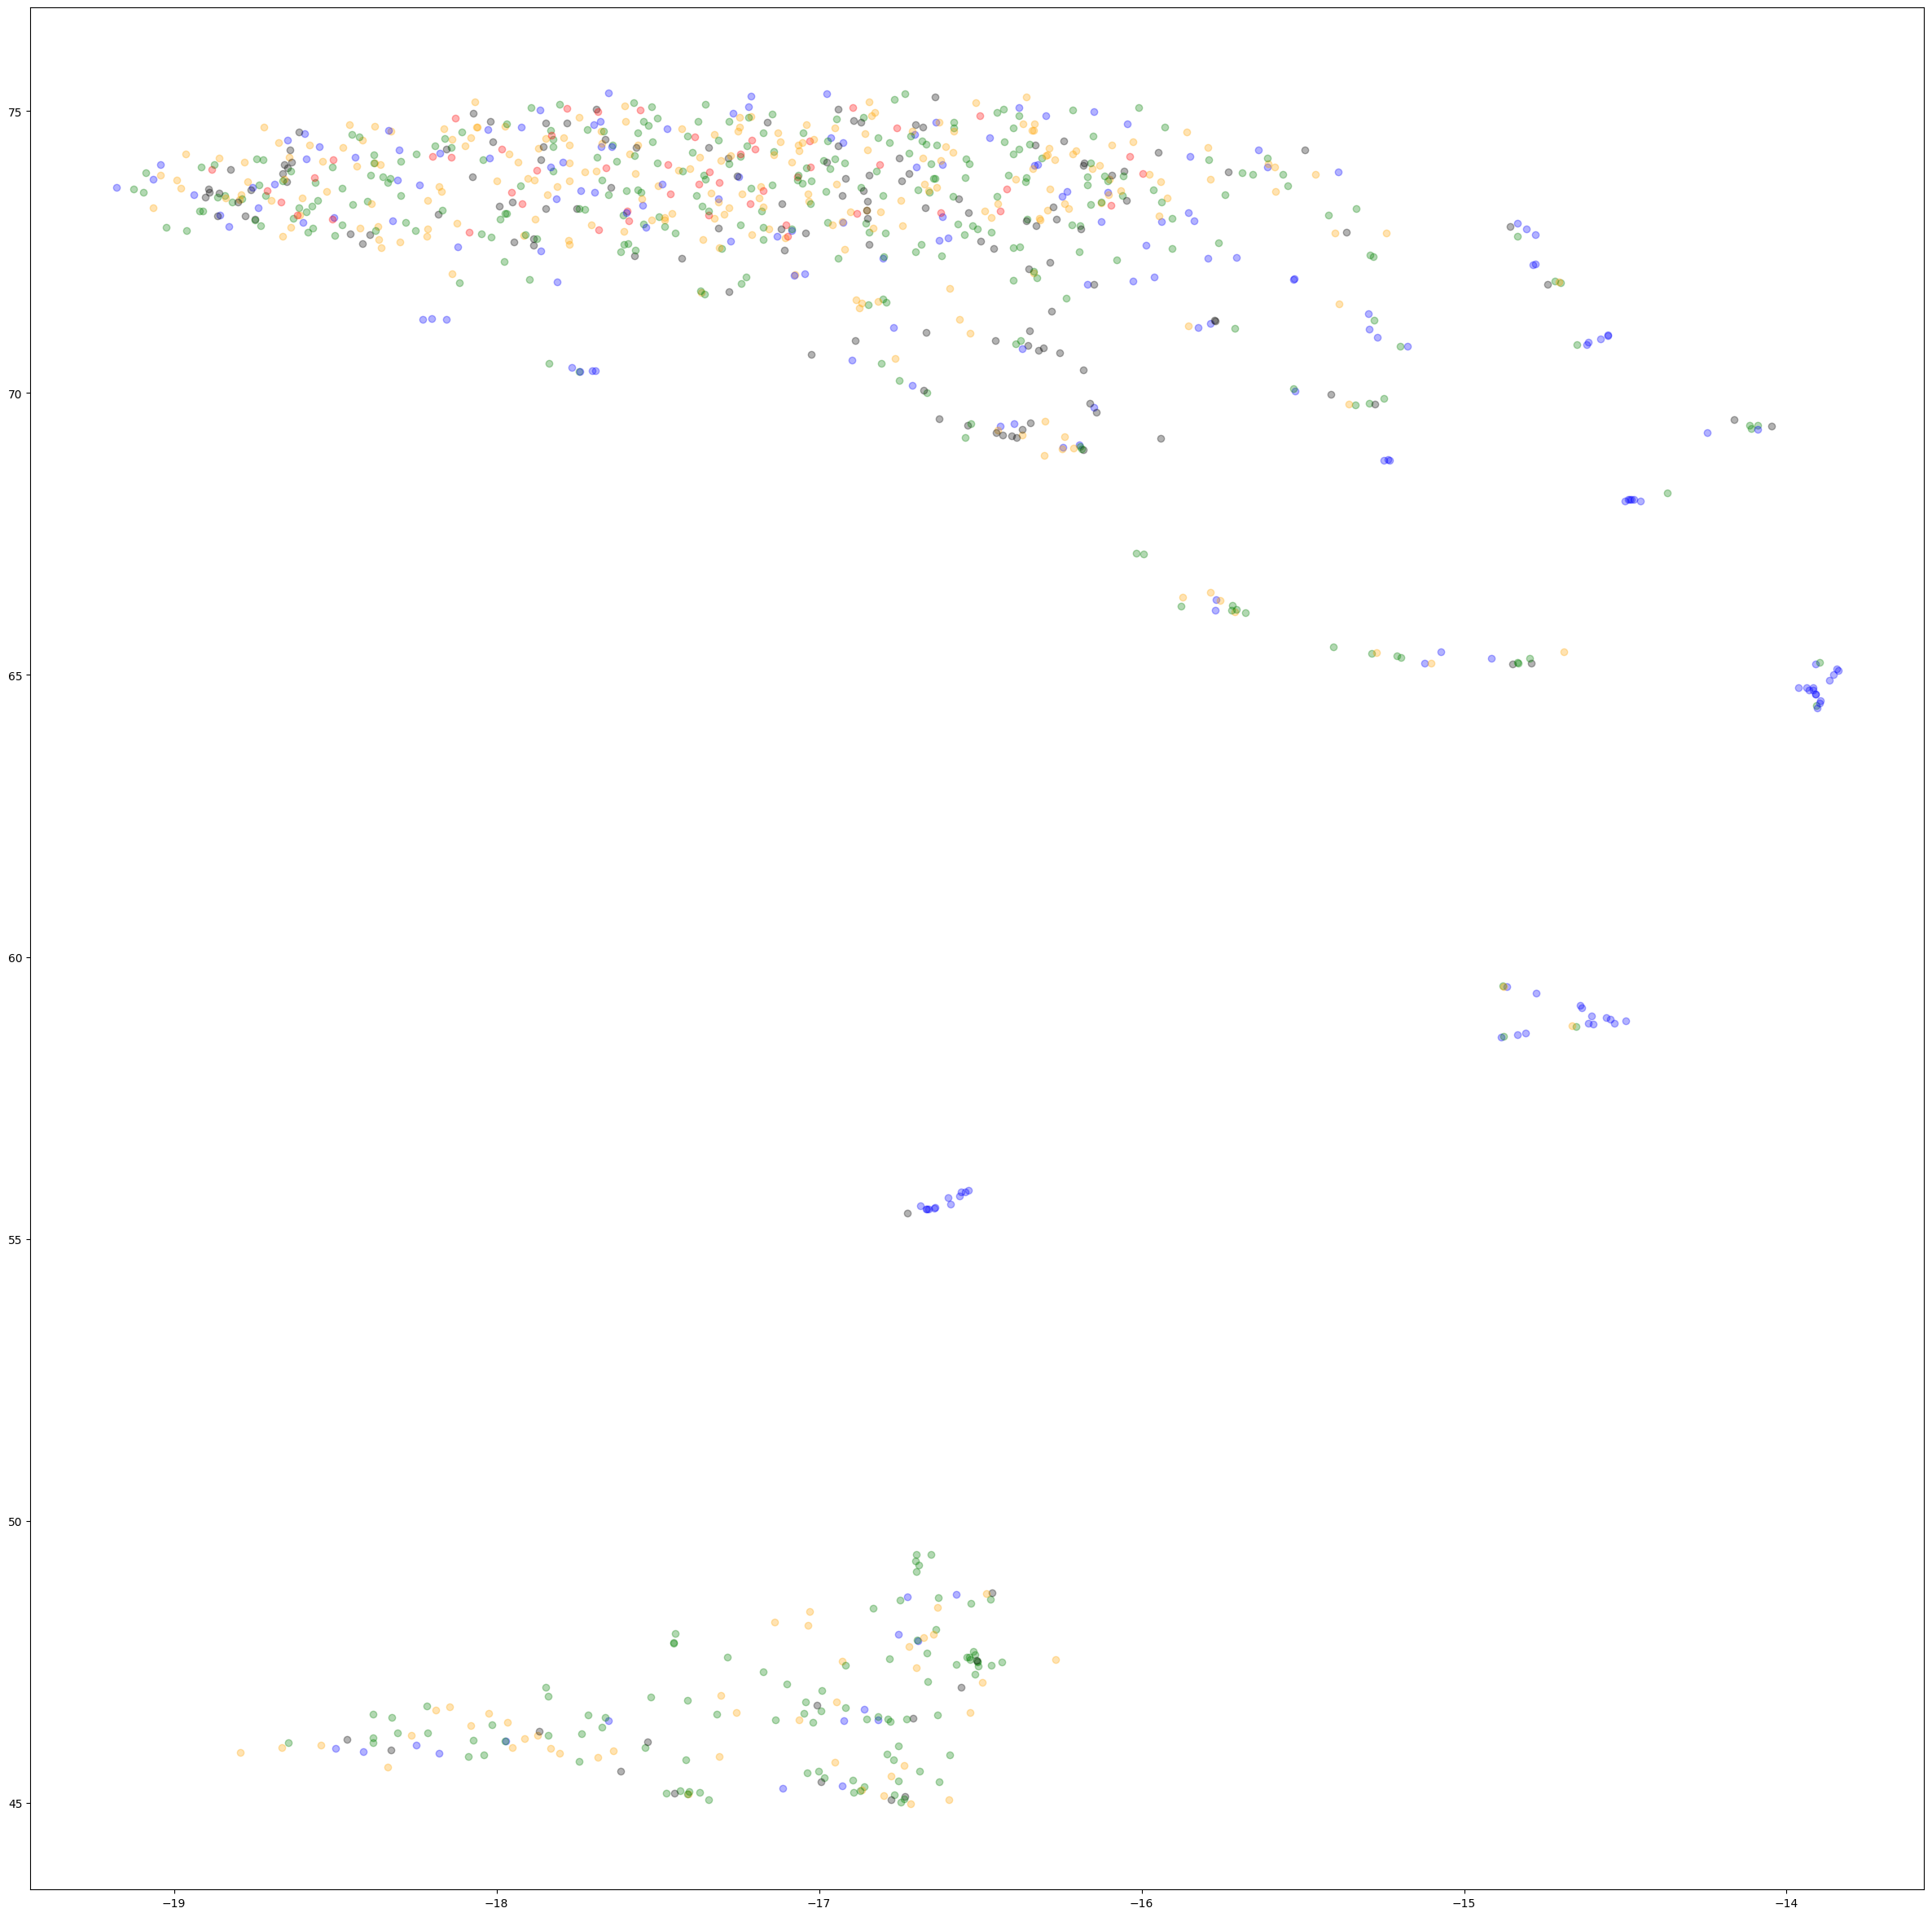

In [4]:
# UMAPによる推論
ser_input = df['px_3mm_grid_flat']
arr_input = list(ser_input)
nparray_input = np.array(arr_input)

mapper = umap.UMAP(n_components=2, 
                   n_neighbors=10,
                   random_state=0)
umap_embedded = mapper.fit_transform(nparray_input)


df_result = df.copy()
df_result['embed_axis1'] = umap_embedded[:, 0]
df_result['embed_axis2'] = umap_embedded[:, 1]
colors =  ["red", "blue", "green", "orange", "black"]
plt.figure(figsize = (30, 30))
for st_shape, col0, col1 in zip(df_result['shape_int'], df_result['embed_axis1'], df_result['embed_axis2']):
    plt.scatter(col0, col1, color=colors[st_shape], alpha=0.3)

plt.show()



In [5]:
df_result.to_pickle('../data/umap_test.pkl')

In [6]:
df_test = pd.read_pickle('../data/umap_test.pkl')
df_test

,time,max_points,shape_str,pressure_avg,shape_int,len_mm,ptx_mm,pty_mm,px_3mm_grid,px_3mm_grid_flat,embed_axis1,embed_axis2
0,0,19,Straight,115.473684,1,80.054154,"[103.16250000000002, 104.32499999999999, 105.2...","[194.4, 194.7, 195.1125, 195.60000000000002, 1...","[[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-15.609513,74.007927
1,2,27,Straight,106.814815,1,237.091119,"[169.0875, 168.82500000000002, 168.7125, 168.7...","[237.9, 238.2375, 238.425, 238.425, 237.4875, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-16.192772,69.075500
2,9,17,Simple curve,109.294118,2,41.309921,"[169.20000000000002, 169.20000000000002, 169.1...","[236.5875, 236.6625, 238.5, 239.9625, 241.125,...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-16.509907,47.498890
3,11,22,Simple curve,118.181818,2,38.290272,"[103.42500000000001, 103.53750000000002, 103.5...","[194.325, 196.275, 197.47500000000002, 198.675...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-16.748190,48.595013
4,14,12,Simple curve,95.833333,2,5.867893,"[102.41250000000002, 102.41250000000002, 102.4...","[231.8625, 231.9, 232.2, 234.5625, 235.2375, 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-16.766342,75.213844
...,...,...,...,...,...,...,...,...,...,...,...,...
1038,1199,43,Complex,122.279070,3,112.590388,"[113.88749999999999, 119.25, 120.9000000000000...","[239.325, 243.6375, 245.175, 246.9, 246.75, 24...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-18.434019,74.020233
1039,1200,26,Complex,116.307692,3,107.168764,"[116.47500000000002, 115.6875, 115.38749999999...","[216.675, 218.925, 221.5125, 230.8500000000000...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-16.513491,75.143776
1040,1204,1,Point,92.000000,0,0.000000,[120.90000000000003],[223.2375],"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-16.882183,73.178162
1041,1204,163,Complex,121.680982,3,550.403779,"[121.19999999999999, 121.16250000000002, 120.9...","[221.175, 220.425, 220.16250000000002, 220.387...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-16.634010,73.644112
